# Figure 1: 

(a) The cumulative distribution of global surface mass loading during all time periods (red) and during time periods with an earthquake occurrence (blue) 

(b) The probability density of global surface mass loading during all time periods (red) and during time periods
with an earthquake occurrence (blue) 

(c) The relative conditional probability of a earthquake occurrence given a value of surface mass load. The histogram represents the relative conditional probabilities for 12573 events. The red line represents where the probability of an earthquake given a value of surface loading (P (earthquake|surface load)) is equal to the probability of an
earthquake (P (earthquake)) 

(d,e,f) These figures represent the same relationships as (a),(b), and (c) for the NND declustered catalog with 9865 events

(g,h,i) These figures represent the same relationships as (a),(b), and (c) for the ETAS declustered catalog with 9865 events

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

<module 'loadquakes' from '/home/bradlipovsky/notebooks/SLIQ2/loadquakes.py'>

### 2. Load datasets

In [2]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv')

402
402
401
376
376
375
71
71
70


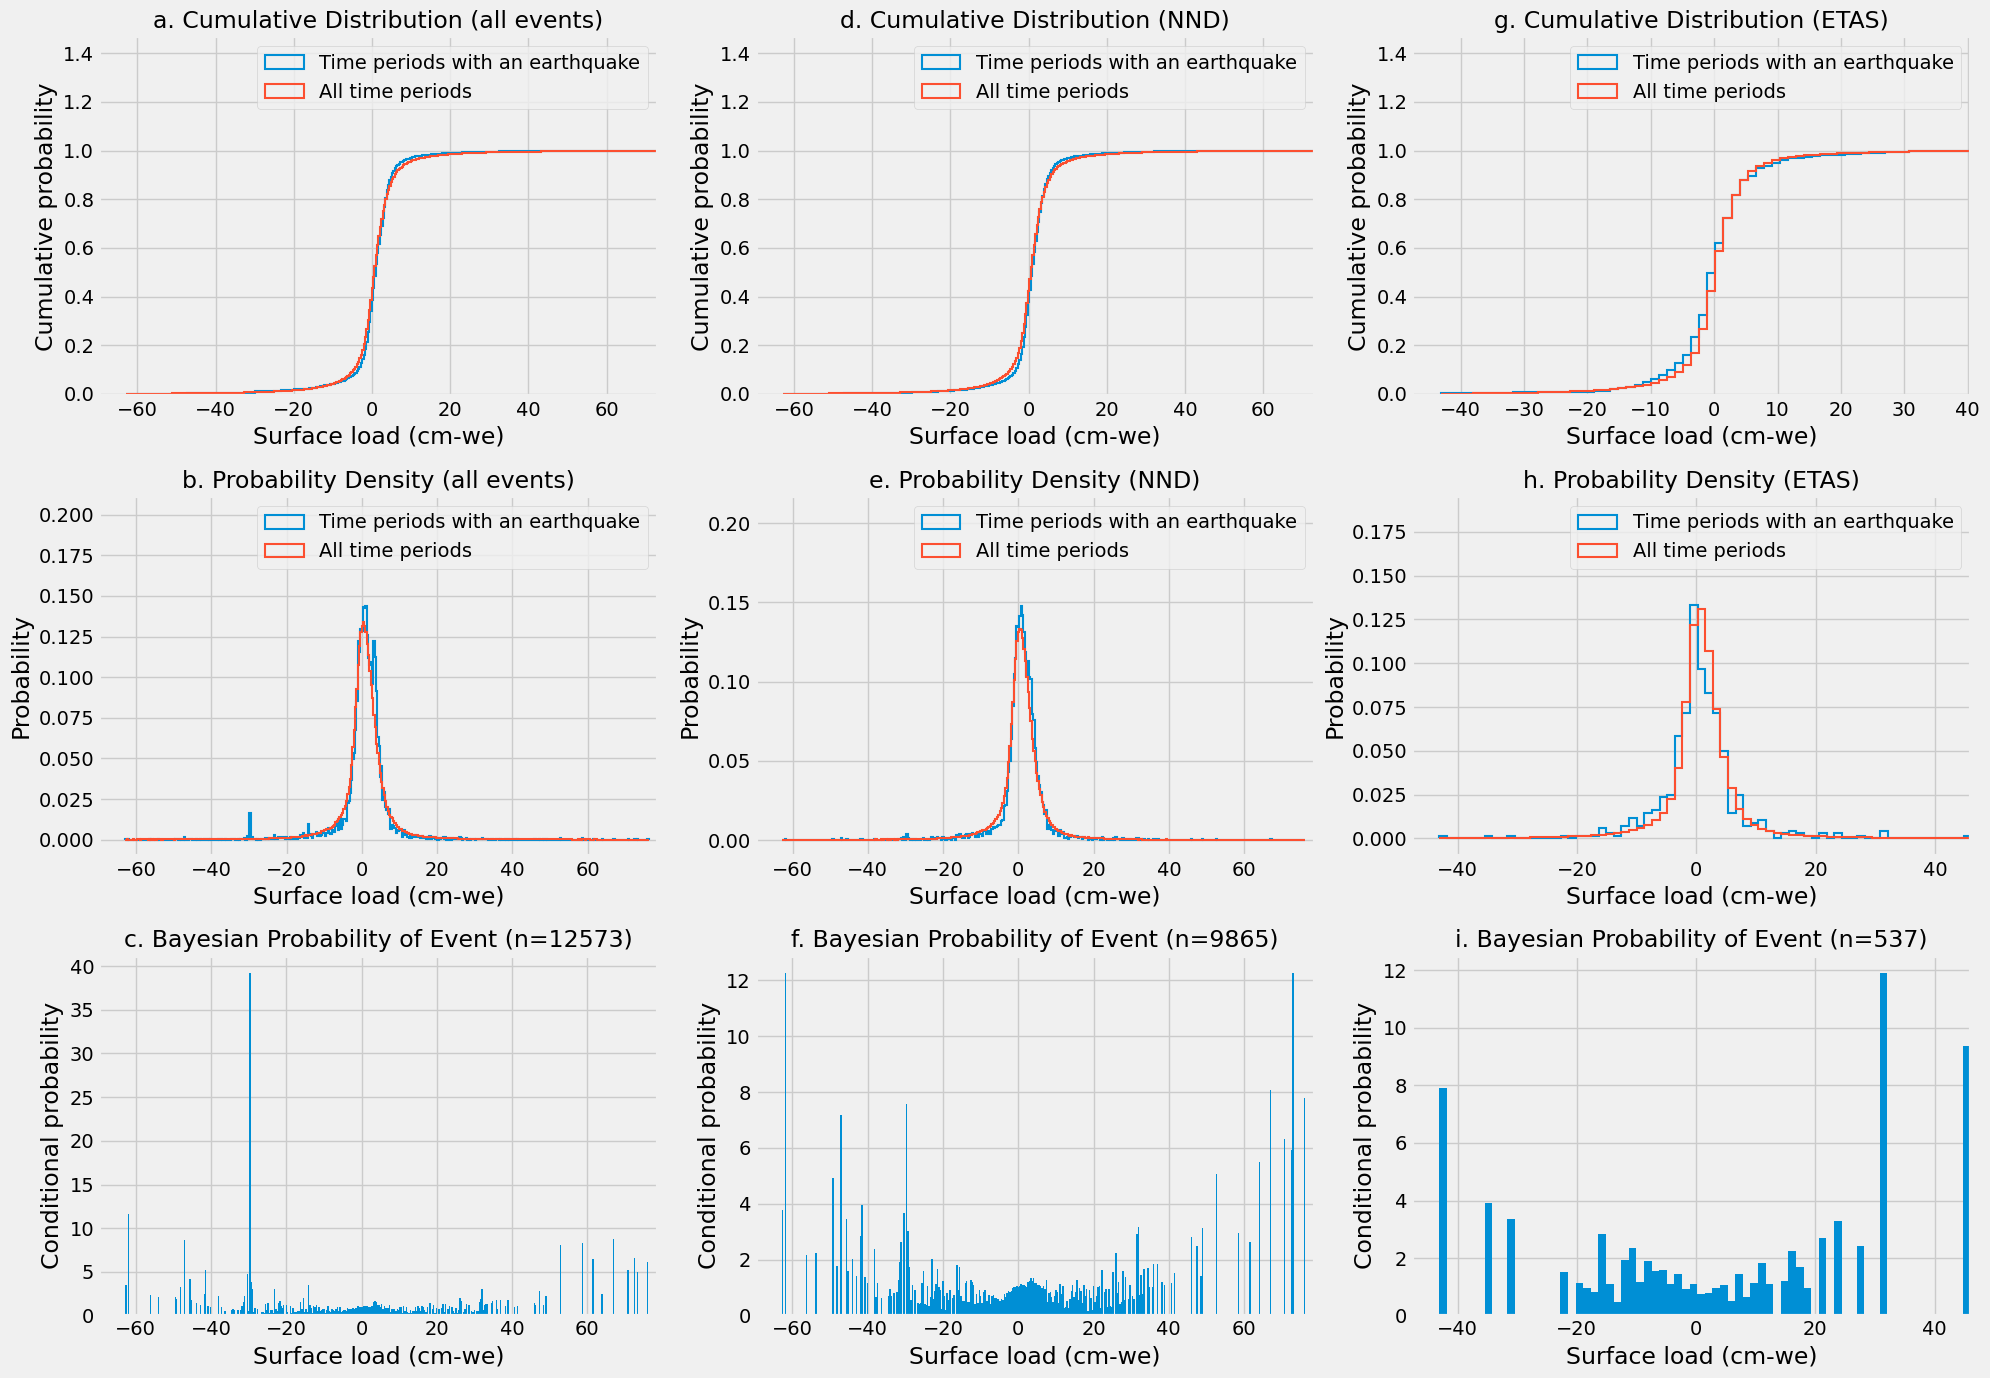

In [6]:
importlib.reload(loadquakes)

def all_figs(all_loads,full_catalog,etas_catalog,nnd_catalog,bayes_title1,bayes_title2,bayes_title3,method):

    fig,((ax1,ax4,ax7),(ax2,ax5,ax8),(ax3,ax6,ax9)) = plt.subplots(3,3, figsize=(20,14))

    plt.style.use('fivethirtyeight')
    
    # full catalog
    loadquakes.plot_hist(all_loads, full_catalog, ax1, ax2, 
              'a. Cumulative Distribution (all events)', 'b. Probability Density (all events)', method)

    loadquakes.plot_bayes(all_loads, full_catalog, ax3, bayes_title1,
                         method)
    
    # catalog declustered using NND method
    loadquakes.plot_hist(all_loads, nnd_catalog, ax4, ax5, 
              'd. Cumulative Distribution (NND)', 
                         'e. Probability Density (NND)',
                         method)

    loadquakes.plot_bayes(all_loads, nnd_catalog, ax6, bayes_title2,
                         method)
    
    # catalog declustered using ETAS method
    loadquakes.plot_hist(all_loads, etas_catalog, ax7, ax8, 
              'g. Cumulative Distribution (ETAS)',
                         'h. Probability Density (ETAS)',
                         method)

    loadquakes.plot_bayes(all_loads, etas_catalog, ax9, bayes_title3,
                         method)
    fig.tight_layout()
    
all_figs(ds['lwe_thickness'].data.flatten(),
         catalog.dmass,
         etas_declustered.dmass,
         NND_declustered.dmass,
         'c. Bayesian Probability of Event (n=12573)',
         'f. Bayesian Probability of Event (n=9865)',
         'i. Bayesian Probability of Event (n=537)',
         'fd')

71
71
70


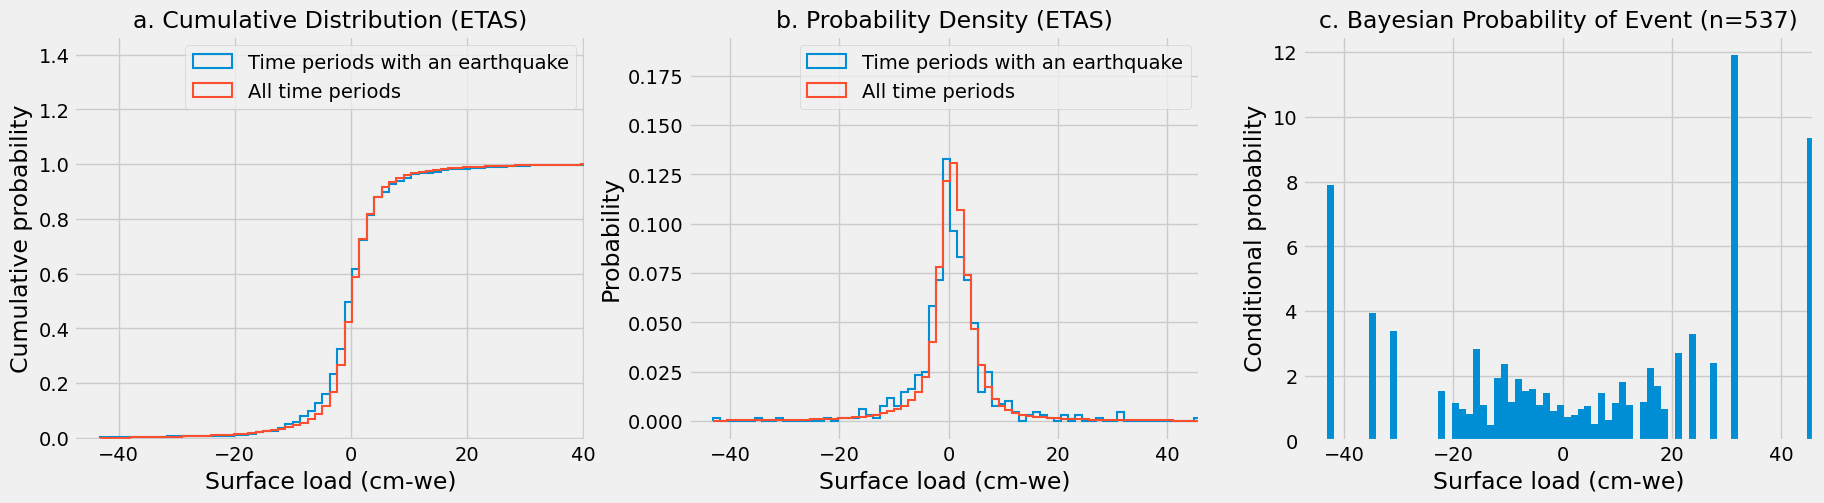

In [5]:
importlib.reload(loadquakes)

# catalog declustered using ETAS method
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))

loadquakes.plot_hist(ds['lwe_thickness'].data.flatten(), etas_declustered.dmass, ax1, ax2,
                     'a. Cumulative Distribution (ETAS)',
                     'b. Probability Density (ETAS)','fd')
loadquakes.plot_bayes(ds['lwe_thickness'].data.flatten(), etas_declustered.dmass, ax3, 
                      'c. Bayesian Probability of Event (n=537)','fd')